# Predicting NBA Salaries using a Neural Network

__Goal__: use a deep neural network (`models/nn.py`) to predict NBA players salaries. Dataset (`NBA Player Stats - 3.csv`) collects the following stats for 73 players from 9 teams.

Stats Collected (from 2022-23 season):
- Age
- Draft Position
- Games Started
- Games Played
- Minutes per Game
- Points per Game
- Field Goal Percentage
- 3-Point Percentage
- Free Throw Percentage
- Offensive Rebounds per Game
- Defensive Rebounds per Game
- Assists per Game
- Blocks per Game
- Steals per Game
- Turnovers per Game

In [169]:
import sys
import math
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from models.nn import NeuralNetwork
import random

Reading Data from CSV (See `NBA Player Stats - 3.csv`)

In [170]:
data_file = open("NBA Player Stats - 3.csv")
data_file.readline()

player_data = []
for line in data_file:
    data = line.split(",")
    for i in range(2, len(data)):
        data[i] = float(data[i])
    player = (data[0:2], np.array(data[2:-1]), np.array(data[-1]))
    player_data.append(player)

Normalizing data

In [171]:
min_vals = player_data[0][1].copy()
max_vals = player_data[0][1].copy()


for player in player_data:
    for i in range(len(player[1])):
        if player[1][i] < min_vals[i]:
            min_vals[i] = player[1][i]
        if player[1][i] > max_vals[i]:
            max_vals[i] = player[1][i]

range_vals = [max_vals[i] - min_vals[i] for i in range(len(min_vals))]

for player in player_data:
    for i in range(len(player[1])):
        player[1][i] = 2 * (player[1][i] - min_vals[i] - range_vals[i] / 2) / range_vals[i]


Shuffling players and dividing into training and testing sets

In [172]:
random.shuffle(player_data)

train_percent = 0.8
train_cutoff = int(len(player_data) * train_percent)
train_data = player_data[0:train_cutoff]
test_data = player_data[train_cutoff:]

train_names = [player[0] for player in train_data]
train_input = [player[1] for player in train_data]
train_salary = [player[2] for player in train_data]
test_names = [player[0] for player in test_data]
test_input = [player[1] for player in test_data]
test_salary = [player[2] for player in test_data]

Define loss function (for training graphs)

In [173]:
def loss(network, d_input, d_output):
    assert len(d_input) == len(d_output)
    predictions = network.predict(d_input)
    n = len(d_input)
    loss = 0
    for i in range(n):
        loss += (predictions[i] - d_output[i]) ** 2
    return math.sqrt(loss / n)

Initialization

Uses four fully connected hidden layers with 30 neurons each.

In [174]:
network = NeuralNetwork(input_dim=len(train_input[0]), hidden_layers=4, layer_sizes=[30, 30, 30, 30])

print("initial training loss", loss(network, train_input, train_salary))
print("initial testing loss", loss(network, test_input, test_salary))

initial training loss 21.187750090999497
initial testing loss 23.59182676405326


Training

training loss 6.607551648779465
testing loss 7.468414735835709


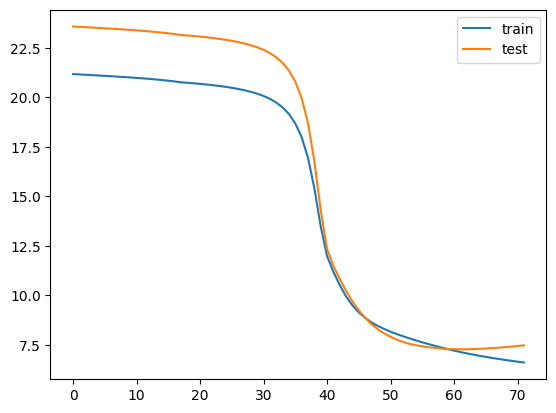

In [175]:
rates = (np.array([0.005, 0.004, 0.003, 0.002, 0.001]), np.array([0.001, 0.0008, 0.0006, 0.0004, 0.0002]))

rounds = 72
train_loss = []
test_loss = []

for i in range(int(rounds / 4)):
    network.train(train_input, train_salary, 2 * rates[0], 2 * rates[1])
    train_loss.append(loss(network, train_input, train_salary))
    test_loss.append(loss(network, test_input, test_salary))

for i in range(3 * int(rounds / 4)):
    network.train(train_input, train_salary, rates[0], rates[1])
    train_loss.append(loss(network, train_input, train_salary))
    test_loss.append(loss(network, test_input, test_salary))

print("training loss", train_loss[-1])
print("testing loss", test_loss[-1])

plt.plot(range(rounds), train_loss, label="train")
plt.plot(range(rounds), test_loss, label="test")
plt.legend()

Showing predictions for testing dataset

In [176]:
predictions = network.predict(test_input)
print("Testing Data Set")
for i in range(len(predictions)):
    print(f"{test_names[i][0]}, {test_names[i][1]} ({round(predictions[i][0] - test_salary[i], 1)}):")
    print(f"\t predicted salary: {round(predictions[i][0], 1)}, actual salary: {test_salary[i]}")

Testing Data Set
Kentavious Caldwell-Pope, Nuggets (-2.7):
	 predicted salary: 12.0, actual salary: 14.7
Jaylen Brown, Celtics (1.9):
	 predicted salary: 32.6, actual salary: 30.7
Michael Porter Jr, Nuggets (-21.3):
	 predicted salary: 12.1, actual salary: 33.4
Josh Hart, Knicks (-1.1):
	 predicted salary: 11.9, actual salary: 13.0
Jevon Carter, Bucks (4.0):
	 predicted salary: 6.2, actual salary: 2.2
Killian Hayes, Pistons (5.5):
	 predicted salary: 12.9, actual salary: 7.4
Jalen Brunson, Knicks (-3.3):
	 predicted salary: 23.0, actual salary: 26.3
Steph Curry, Warriors (-4.3):
	 predicted salary: 47.6, actual salary: 51.9
Jaden Ivey, Pistons (9.1):
	 predicted salary: 16.7, actual salary: 7.6
Pat Connaughton, Bucks (-2.8):
	 predicted salary: 6.6, actual salary: 9.4
Rudy Gay, Jazz (8.1):
	 predicted salary: 14.6, actual salary: 6.5
D'Angelo Russell, Lakers (-8.9):
	 predicted salary: 22.5, actual salary: 31.4
Donte DiVincenzo, Warriors (5.2):
	 predicted salary: 9.9, actual salary: 4

Overfitting a small training set

training loss 0.5871372974846633
testing loss 11.601429338026843
Testing Data Set
Anthony Davis, Lakers (0.2):
	 predicted salary: 40.8, actual salary: 40.6
Cory Joseph, Pistons (-0.1):
	 predicted salary: 5.0, actual salary: 5.1
Malik Beasley, Lakers (-0.3):
	 predicted salary: 16.2, actual salary: 16.5
Marcus Smart, Celtics (-0.2):
	 predicted salary: 18.4, actual salary: 18.6
Austin Rivers, Twolves (0.9):
	 predicted salary: 2.7, actual salary: 1.8
Immanuel Quickley, Knicks (-1.0):
	 predicted salary: 3.2, actual salary: 4.2
Dennis Schroeder, Lakers (1.1):
	 predicted salary: 2.9, actual salary: 1.8
Saddiq Bey, Pistons (1.3):
	 predicted salary: 5.8, actual salary: 4.5
Klay Thompson, Warriors (-0.8):
	 predicted salary: 42.4, actual salary: 43.2
Jordan Clarkson, Jazz (-0.2):
	 predicted salary: 14.1, actual salary: 14.3
Ochai Agbaji, Jazz (-0.5):
	 predicted salary: 3.6, actual salary: 4.1
Mitchell Robinson, Knicks (0.1):
	 predicted salary: 15.8, actual salary: 15.7
Khris Middleton

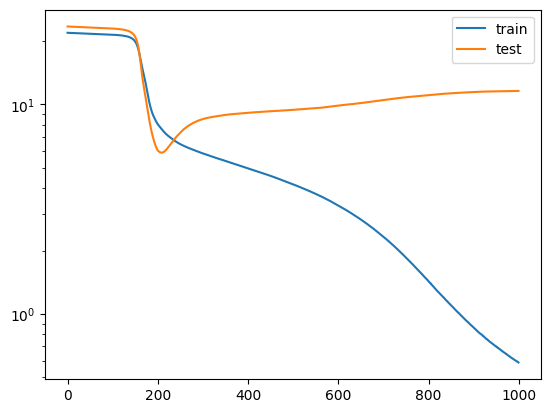

In [180]:
network = NeuralNetwork(input_dim=len(train_input[0]), hidden_layers=5, layer_sizes=[30, 30, 30, 30, 30])
rates = (np.array([0.02, 0.01, 0.07, 0.004, 0.002, 0.001]), np.array([0.002, 0.001, 0.0008, 0.0006, 0.0004, 0.0002]))

rounds = 10
eras = 10
train_small_loss = []
test_loss = []
num = 20
mult = 0.8

for i in range(eras):
    for j in range(rounds):
        network.train(train_input[0:num], train_salary[0:num], mult * rates[0], mult * rates[1])
        train_small_loss.append(loss(network, train_input[0:num], train_salary[0:num]))
        test_loss.append(loss(network, test_input, test_salary))
    mult *= 0.80

for i in range(3 * eras):
    for j in range(3 * rounds):
        network.train(train_input[0:num], train_salary[0:num], mult * rates[0], mult * rates[1])
        train_small_loss.append(loss(network, train_input[0:num], train_salary[0:num]))
        test_loss.append(loss(network, test_input, test_salary))
    mult *= .98

# mult *= 1.5


print("training loss", train_small_loss[-1])
print("testing loss", test_loss[-1])

plt.plot(range(len(train_small_loss)), train_small_loss, label="train")
plt.plot(range(len(test_loss)), test_loss, label="test")
plt.yscale("log")
plt.legend()

predictions = network.predict(train_input[0:num])
print("Testing Data Set")
for i in range(num):
    print(f"{train_names[i][0]}, {train_names[i][1]} ({round(predictions[i][0] - train_salary[i], 1)}):")
    print(f"\t predicted salary: {round(predictions[i][0], 1)}, actual salary: {train_salary[i]}")